# Classify Shark and Whale Using Neural Network

Just the same with Day 21 with different case 

## Import modules and datasets

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2 
import os

In [2]:
img = image.load_img('data/training/shark/shark (1).jpg')

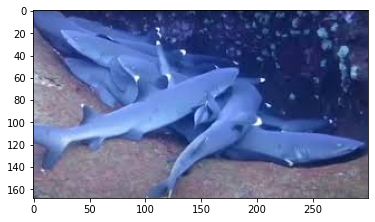

In [3]:
plt.imshow(img)

In [4]:
cv2.imread('data/training/shark/shark (1).jpg').shape

(168, 300, 3)

## ImageDataGenerator

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('data/training/',
                                          target_size = (150,150),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('data/validation',
                                               target_size = (150,150),
                                               batch_size = 3,
                                               class_mode = 'binary')

Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'shark': 0, 'whale': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [9]:
len(train_dataset.classes)

200

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    #
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [18]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=10,
                      epochs=20,
                      validation_data = validation_dataset)

Epoch 1/20
10/10 [==============================] - 2s 171ms/step - loss: 0.4706 - accuracy: 0.8000 - val_loss: 0.8926 - val_accuracy: 0.6750
Epoch 2/20
10/10 [==============================] - 2s 157ms/step - loss: 0.5502 - accuracy: 0.9667 - val_loss: 1.4478 - val_accuracy: 0.6250
Epoch 3/20
10/10 [==============================] - 2s 160ms/step - loss: 0.4502 - accuracy: 0.9000 - val_loss: 1.0113 - val_accuracy: 0.6750
Epoch 4/20
10/10 [==============================] - 2s 157ms/step - loss: 0.2006 - accuracy: 0.9655 - val_loss: 1.0673 - val_accuracy: 0.6750
Epoch 5/20
10/10 [==============================] - 2s 158ms/step - loss: 1.2710 - accuracy: 0.7667 - val_loss: 0.6442 - val_accuracy: 0.7000
Epoch 6/20
10/10 [==============================] - 2s 163ms/step - loss: 0.3312 - accuracy: 0.8333 - val_loss: 0.9580 - val_accuracy: 0.6000
Epoch 7/20
10/10 [==============================] - 2s 159ms/step - loss: 0.2628 - accuracy: 0.9333 - val_loss: 1.0177 - val_accuracy: 0.7250
Epoch 

I was train the data for three times, and I got overfitting (accuracy is too much high than the val_accuracy)

I think this because the data is not really good for classification

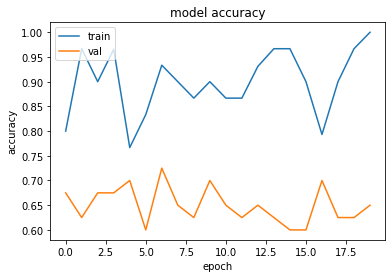

In [24]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

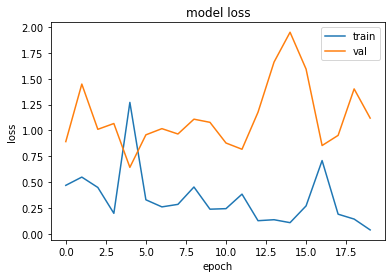

In [25]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Well, next time I promise will do better

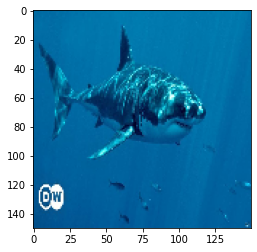

This is shark


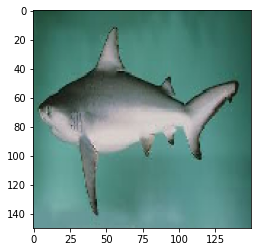

This is whale


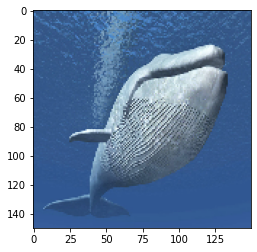

This is whale


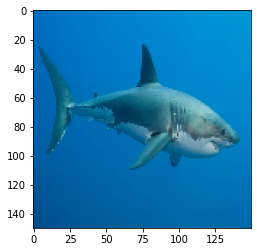

This is whale


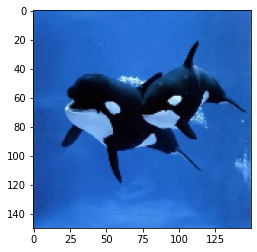

This is whale


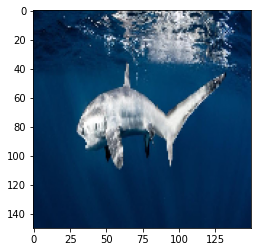

This is whale


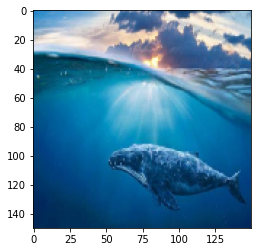

This is shark


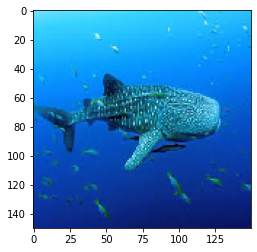

This is whale


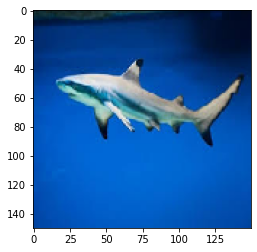

This is whale


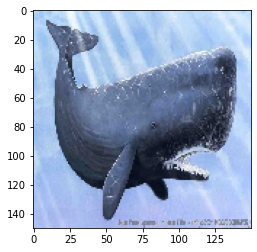

This is whale


In [27]:
test_dir = 'data/testing'

for i in os.listdir(test_dir):
    img = image.load_img(test_dir+'//'+i, target_size=(150, 150))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("This is shark")
    else:
        print("This is whale")

Well from 10 picture above, I just got 5 right and 5 wrong. 

It's fine, and most likely same with the val_accuracy

Next time let's do better